# Optimizer LCD sur le jeu de données FashionMnist

In [3]:
# Quelques packages à charger
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np                                                                    
from data import FASHION_MNIST_flatten    
from keras import losses, metrics                                                     
import tirages    

## Chargement du jeu de données Fashion Mnist (pour visualiser uniquement)

In [4]:
# chargement du jeu de données
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


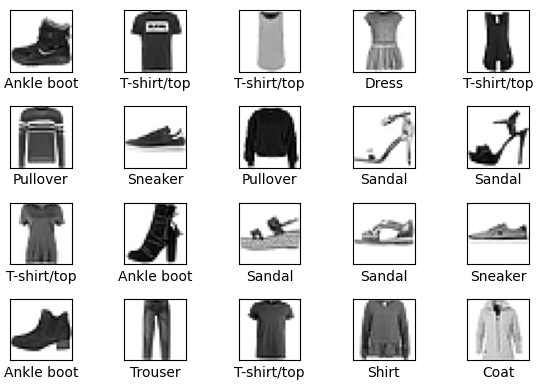

In [5]:
# Define the class names for the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display 20 images along with their labels
plt.figure(figsize=(6, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

## Chargement du jeu de données et mise en données

In [6]:
type='float32'                                                 
tf.keras.backend.set_floatx(type)                                                                                      
# Preparation du jeu de données (normalisation etc.)                  
x_train, y_train, x_test, y_test = FASHION_MNIST_flatten(type)


I0000 00:00:1729259971.165724   49921 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 15:59:31.166150: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Choix de l'architecture

In [7]:
# 'FC' pour 'Fully Connected'
name_model="FC" 
# 784 neurones dans la première couche, 400 dans la suivante et 10 (taille de la sortie 'class_names')
nbNeurons=[784,400,10]  
# fonctions d'activations 'tanh' sur les couches latentes, 'softmax' sur la dernière (celle de la sortie)
activations=['tanh','softmax']                          
# fonction de coût 'norme L2'
loss = losses.MeanSquaredError()
# métrique de référence: précision en termes de classification
metrics = ["categorical_accuracy"]
# Type d'initialisation aléatoire des poids
name_init="Xavier"        
# paramètres 'dummy' pour cette étude
params_init=[-1,1]      
                           

## Apprentissage avec l'optimiseur Adam

In [8]:
#paramètres d'arrêt (communs à tous les optimiseurs)               
eps=10**(-4); max_epochs=1000      
#paramètres d'entrainement communs à tous les optimiseurs                                                        
lr=0.1

# paramètres de LCEGD
seuil=0.01                                                                            
f1=30; f2=10000; lambd=0.5; rho=0.9; eps_egd=0.01  

# paramètres d'adam (si adam est utilisé)
beta_1=0.9; beta_2=0.999; epsilon=1e-07                                               
amsgrad=False     

In [9]:
# Qqs paramètres secondaires
tirageMin=0; nbTirages=1;

# si =1, tous les exemples ont les mêmes poids
sample_weight=1

# Algorithme adaptatif de la thèse de Bilel Bensaid
algo="Adam"     
# Lancement de l'apprentissage
studies = tirages.tirages(tirageMin,nbTirages,name_model,nbNeurons,activations,loss,name_init,params_init,metrics,
x_train,y_train,algo,eps,max_epochs,lr,seuil,f1,f2,rho,eps_egd,lambd,beta_1,beta_2,epsilon,amsgrad,sample_weight,
"simple",x_test,y_test)
print(studies)


/net/npers/gpoette/ML/lib64/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training loss (for one batch) at step 2: 0.17777067
grad:  tf.Tensor(0.02459053, shape=(), dtype=float32)
Training loss (for one batch) at step 4: 0.17737323
grad:  tf.Tensor(0.0505416, shape=(), dtype=float32)
Training loss (for one batch) at step 6: 0.16268885
grad:  tf.Tensor(0.019381123, shape=(), dtype=float32)
Training loss (for one batch) at step 8: 0.16062826
grad:  tf.Tensor(0.0008947026, shape=(), dtype=float32)
Training loss (for one batch) at step 10: 0.16060004
grad:  tf.Tensor(0.00097149826, shape=(), dtype=float32)
Training loss (for one batch) at step 12: 0.16080460
grad:  tf.Tensor(0.0017533407, shape=(), dtype=float32)
Training loss (for one batch) at step 14: 0.16029365
grad:  tf.Tensor(0.0010745389, shape=(), dtype=float32)
Training loss (for one batch) at step 16: 0.15932447
grad:  tf.Tensor(0.020184739, shape=(), dtype=float32)
Training loss (for one batch) at step 18: 0.16081934
grad:  tf.Tensor(0.0003136107, shape=(), dtype=float32)
Training loss (for one batch)

## Apprentissage avec l'optimiseur de la thèse de Bilel Bensaid

In [ ]:
# Qqs paramètres secondaires
tirageMin=0; nbTirages=1;

# si =1, tous les exemples ont les mêmes poids
sample_weight=1

# Algorithme adaptatif de la thèse de Bilel Bensaid
algo="LC_EGD2"     
# Lancement de l'apprentissage
studies = tirages.tirages(tirageMin,nbTirages,name_model,nbNeurons,activations,loss,name_init,params_init,metrics,
x_train,y_train,algo,eps,max_epochs,lr,seuil,f1,f2,rho,eps_egd,lambd,beta_1,beta_2,epsilon,amsgrad,sample_weight,
"simple",x_test,y_test)
print(studies)


cost_init:  tf.Tensor(0.119567335, shape=(), dtype=float32)

Start of epoch 2
Training loss (for one batch) at epoch 2: 0.10738212
grad:  tf.Tensor(0.2253113, shape=(), dtype=float32)
lr:  2028.6020648339486
dim:  tf.Tensor(-0.0059922934, shape=(), dtype=float32)
top:  tf.Tensor(-51.491173, shape=(), dtype=float32)

Start of epoch 4
Training loss (for one batch) at epoch 4: 0.09965721
grad:  tf.Tensor(0.24199158, shape=(), dtype=float32)
lr:  5456.955757827525
dim:  tf.Tensor(-0.005275026, shape=(), dtype=float32)
top:  tf.Tensor(-159.77945, shape=(), dtype=float32)

Start of epoch 6
Training loss (for one batch) at epoch 6: 0.09513728
grad:  tf.Tensor(0.1349662, shape=(), dtype=float32)
lr:  1145.1518032108636
dim:  tf.Tensor(-0.0016312152, shape=(), dtype=float32)
top:  tf.Tensor(-10.429971, shape=(), dtype=float32)

Start of epoch 8
Training loss (for one batch) at epoch 8: 0.09225729
grad:  tf.Tensor(0.10907527, shape=(), dtype=float32)
lr:  860.3915972377324
dim:  tf.Tensor(-0.001